In [1]:
import pandas as pd 
import numpy as np 
import datetime 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# Options
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
#pd.set_option('display.max_colwidth', -1) 

In [3]:
#Load Private
Private_Sector = pd.read_csv('Data/Private Sector.csv') 
Private_Sector.head() 

,DATE,W994RC1Q027SBEA
0,1960-01-01,9.539
1,1960-04-01,12.862
2,1960-07-01,18.488
3,1960-10-01,23.013
4,1961-01-01,26.197


In [4]:
#dtype check
type(Private_Sector['W994RC1Q027SBEA'][0]) 

numpy.float64

In [5]:
#Rename Private Net values column 
Private_Sector.rename(columns = {'DATE' : 'DATE_Private', 'W994RC1Q027SBEA': 'Priv_Net'}, inplace=True) 
Private_Sector.head() 

,DATE_Private,Priv_Net
0,1960-01-01,9.539
1,1960-04-01,12.862
2,1960-07-01,18.488
3,1960-10-01,23.013
4,1961-01-01,26.197


In [6]:
#Load Public
Public_Sector = pd.read_csv('Data/Public Sector.csv') 
Public_Sector.head() 

,DATE,AD01RC1Q027SBEA
0,1960-01-01,-7.674
1,1960-04-01,-11.139
2,1960-07-01,-14.275
3,1960-10-01,-18.129
4,1961-01-01,-20.760


In [7]:
#dtype check
type(Public_Sector['AD01RC1Q027SBEA'][0])

numpy.float64

In [8]:
#Rename Public df columns
Public_Sector.rename(columns = {'DATE': 'DATE_Public','AD01RC1Q027SBEA': 'Pub_Net'}, inplace=True)
Public_Sector.head()

,DATE_Public,Pub_Net
0,1960-01-01,-7.674
1,1960-04-01,-11.139
2,1960-07-01,-14.275
3,1960-10-01,-18.129
4,1961-01-01,-20.760


In [9]:
#Load CA
Current_Account = pd.read_csv('Data/Current Account.csv')
Current_Account.head()

,DATE,RWLBCAQ027S
0,1946-10-01,-4917
1,1947-01-01,.
2,1947-04-01,.
3,1947-07-01,.
4,1947-10-01,-9289


In [10]:
#Rut Row - we're going to have to do some math later with these values, so we'll need to convert them to floats
type(Current_Account['RWLBCAQ027S'][0])

str

In [11]:
#Also, there are some '.' in place of empty data. So we need to covert these to np.NaN prior to 
      #  converting string to float
Current_Account['RWLBCAQ027S'] = Current_Account['RWLBCAQ027S'].replace(['.'], np.NaN)

In [12]:
#Spot check
Current_Account.head()

,DATE,RWLBCAQ027S
0,1946-10-01,-4917
1,1947-01-01,NaN
2,1947-04-01,NaN
3,1947-07-01,NaN
4,1947-10-01,-9289


In [13]:
#Now convert the data values dtypes from str to float
Current_Account['RWLBCAQ027S'] = Current_Account['RWLBCAQ027S'].astype(float)
type(Current_Account['RWLBCAQ027S'][0])

numpy.float64

In [122]:
#Rename CA df columns
Current_Account.rename(columns = {'DATE': 'DATE_CA','RWLBCAQ027S': 'CA_Net'}, inplace=True)
Current_Account.head()

,DATE_CA,CA_Net
0,1946-10-01,-4917.0
1,1947-01-01,NaN
2,1947-04-01,NaN
3,1947-07-01,NaN
4,1947-10-01,-9289.0


In [123]:
#Load GDP
GDP = pd.read_csv('Data/GDP.csv')
GDP.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [124]:
#Rename GDP Date column
GDP.rename(columns = {'DATE': 'DATE_GDP'}, inplace=True)
GDP.head()

,DATE_GDP,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


# Understanding Private_Sector DATE ranges

In [125]:
Len_Priv = len(Private_Sector.DATE_Private)
Len_Priv

247

In [126]:
Private_Sector.DATE_Private[0]

'1960-01-01'

In [127]:
Private_Sector.DATE_Private[246]

'2021-07-01'

# Public_Sector DATE ranges

In [128]:
Len_Pub = len(Public_Sector.DATE_Public)
Len_Pub

247

In [129]:
Public_Sector.DATE_Public[0]

'1960-01-01'

In [130]:
Public_Sector.DATE_Public[246]

'2021-07-01'

# Current_Account DATE ranges

In [131]:
Len_CA = len(Current_Account.DATE_CA)
Len_CA

284

In [132]:
Current_Account.DATE_CA[0]

'1946-10-01'

In [133]:
Current_Account.DATE_CA[230]

'2004-04-01'

# GDP DATE ranges

In [134]:
Len_GDP = len(GDP.DATE_GDP)
Len_GDP

300

In [135]:
GDP.DATE_GDP[0]

'1947-01-01'

In [136]:
GDP.DATE_GDP[247]

'2008-10-01'

TypeError: bad operand type for unary -: 'str'

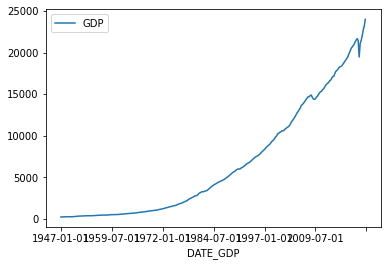

In [137]:
#Test plot of GDP df
ax = GDP.plot(x='DATE_GDP', y='GDP')
GDP.plot(ax=ax, x=-'DATE_GDP', y='GDP')
plt.show()

### After exploring the different datas' date ranges,  we should drop anything before the first dates available in the Private and Public Sector data from the CA and GDP data


In [138]:
# Get first date in Private Sector date series
start = Private_Sector.DATE_Private[0]
start

'1960-01-01'

In [139]:
#Double check same start date for Public Sector date series
Public_Sector.DATE_Public[0] == start

True

In [140]:
#Cut Current_Account series to align with Public & Private data start dates
Current_Account = Current_Account[Current_Account['DATE_CA']>=start]
Current_Account = Current_Account.reset_index(drop=True)
Current_Account.head()

,DATE_CA,CA_Net
0,1960-01-01,-1725.0
1,1960-04-01,-2487.0
2,1960-07-01,-3697.0
3,1960-10-01,-4778.0
4,1961-01-01,-5331.0


In [141]:
#Cut GDP series to align with Public & Private data start dates
GDP = GDP[GDP['DATE_GDP']>=start]
GDP = GDP.reset_index(drop=True)
GDP.head()

,DATE_GDP,GDP
0,1960-01-01,542.648
1,1960-04-01,541.080
2,1960-07-01,545.604
3,1960-10-01,540.197
4,1961-01-01,545.018


In [142]:
#Combine the 4 dataframes into one
df = pd.concat([GDP, Private_Sector, Public_Sector, Current_Account], axis=1)

In [143]:
#Might as well rename the date column
df.rename(columns = {'DATE_GDP': 'DATE'}, inplace=True)
df

,DATE,GDP,DATE_Private,Priv_Net,DATE_Public,Pub_Net,DATE_CA,CA_Net
0,1960-01-01,542.648,1960-01-01,9.539,1960-01-01,-7.674,1960-01-01,-1725.0
1,1960-04-01,541.080,1960-04-01,12.862,1960-04-01,-11.139,1960-04-01,-2487.0
2,1960-07-01,545.604,1960-07-01,18.488,1960-07-01,-14.275,1960-07-01,-3697.0
3,1960-10-01,540.197,1960-10-01,23.013,1960-10-01,-18.129,1960-10-01,-4778.0
4,1961-01-01,545.018,1961-01-01,26.197,1961-01-01,-20.760,1961-01-01,-5331.0
...,...,...,...,...,...,...,...,...
243,2020-10-01,21477.597,2020-10-01,1665.589,2020-10-01,-2374.247,NaN,NaN
244,2021-01-01,22038.226,2021-01-01,3642.256,2021-01-01,-4462.379,NaN,NaN
245,2021-04-01,22740.959,2021-04-01,1834.073,2021-04-01,-2641.359,NaN,NaN
246,2021-07-01,23202.344,2021-07-01,1321.359,2021-07-01,-2171.973,NaN,NaN


In [144]:
len(GDP['DATE_GDP'].notnull())

248

In [145]:
len(Private_Sector['DATE_Private'].notnull())

247

In [146]:
len(Public_Sector['DATE_Public'].notnull())

247

In [147]:
len(Current_Account['DATE_CA'].notnull())

231

In [148]:
#GDP has the most non-null dates, so we will use that column as the date range for the combined df
#Therefore we will drop the other date series
df = df.drop(['DATE_Public', 'DATE_Private', 'DATE_CA'], axis=1)

# Calulating the three Sectors as a percentage of GDP

In [149]:
df["Private_%_GDP"] = (( df["Priv_Net"] / df['GDP'] ) * 100)
df

,DATE,GDP,Priv_Net,Pub_Net,CA_Net,Private_%_GDP
0,1960-01-01,542.648,9.539,-7.674,-1725.0,1.757861
1,1960-04-01,541.080,12.862,-11.139,-2487.0,2.377098
2,1960-07-01,545.604,18.488,-14.275,-3697.0,3.388538
3,1960-10-01,540.197,23.013,-18.129,-4778.0,4.260113
4,1961-01-01,545.018,26.197,-20.760,-5331.0,4.806630
...,...,...,...,...,...,...
243,2020-10-01,21477.597,1665.589,-2374.247,NaN,7.755006
244,2021-01-01,22038.226,3642.256,-4462.379,NaN,16.526993
245,2021-04-01,22740.959,1834.073,-2641.359,NaN,8.065064
246,2021-07-01,23202.344,1321.359,-2171.973,NaN,5.694938


In [150]:
df["Public_%_GDP"] = (( df["Pub_Net"] / df['GDP'] ) * 100)
df

,DATE,GDP,Priv_Net,Pub_Net,CA_Net,Private_%_GDP,Public_%_GDP
0,1960-01-01,542.648,9.539,-7.674,-1725.0,1.757861,-1.414176
1,1960-04-01,541.080,12.862,-11.139,-2487.0,2.377098,-2.058660
2,1960-07-01,545.604,18.488,-14.275,-3697.0,3.388538,-2.616366
3,1960-10-01,540.197,23.013,-18.129,-4778.0,4.260113,-3.355998
4,1961-01-01,545.018,26.197,-20.760,-5331.0,4.806630,-3.809049
...,...,...,...,...,...,...,...
243,2020-10-01,21477.597,1665.589,-2374.247,NaN,7.755006,-11.054528
244,2021-01-01,22038.226,3642.256,-4462.379,NaN,16.526993,-20.248358
245,2021-04-01,22740.959,1834.073,-2641.359,NaN,8.065064,-11.614985
246,2021-07-01,23202.344,1321.359,-2171.973,NaN,5.694938,-9.361007


In [151]:
df["Foreign_%_GDP"] = ((( df["CA_Net"] / 1000 ) / df['GDP']  ) * 100)
df

,DATE,GDP,Priv_Net,Pub_Net,CA_Net,Private_%_GDP,Public_%_GDP,Foreign_%_GDP
0,1960-01-01,542.648,9.539,-7.674,-1725.0,1.757861,-1.414176,-0.317886
1,1960-04-01,541.080,12.862,-11.139,-2487.0,2.377098,-2.058660,-0.459636
2,1960-07-01,545.604,18.488,-14.275,-3697.0,3.388538,-2.616366,-0.677598
3,1960-10-01,540.197,23.013,-18.129,-4778.0,4.260113,-3.355998,-0.884492
4,1961-01-01,545.018,26.197,-20.760,-5331.0,4.806630,-3.809049,-0.978133
...,...,...,...,...,...,...,...,...
243,2020-10-01,21477.597,1665.589,-2374.247,NaN,7.755006,-11.054528,NaN
244,2021-01-01,22038.226,3642.256,-4462.379,NaN,16.526993,-20.248358,NaN
245,2021-04-01,22740.959,1834.073,-2641.359,NaN,8.065064,-11.614985,NaN
246,2021-07-01,23202.344,1321.359,-2171.973,NaN,5.694938,-9.361007,NaN


In [181]:
#Testing converting DATE values to dto's

#df['DATE'] = df['DATE'].apply(lambda x:datetime.datetime.strptime(x,'%yyyy-%mm-%dd'))

In [152]:
#Some datatype checking
type(df['Private_%_GDP'][0])

numpy.float64

In [153]:
type(df['Public_%_GDP'][0])

numpy.float64

In [154]:
type(df['Foreign_%_GDP'][0])

numpy.float64

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

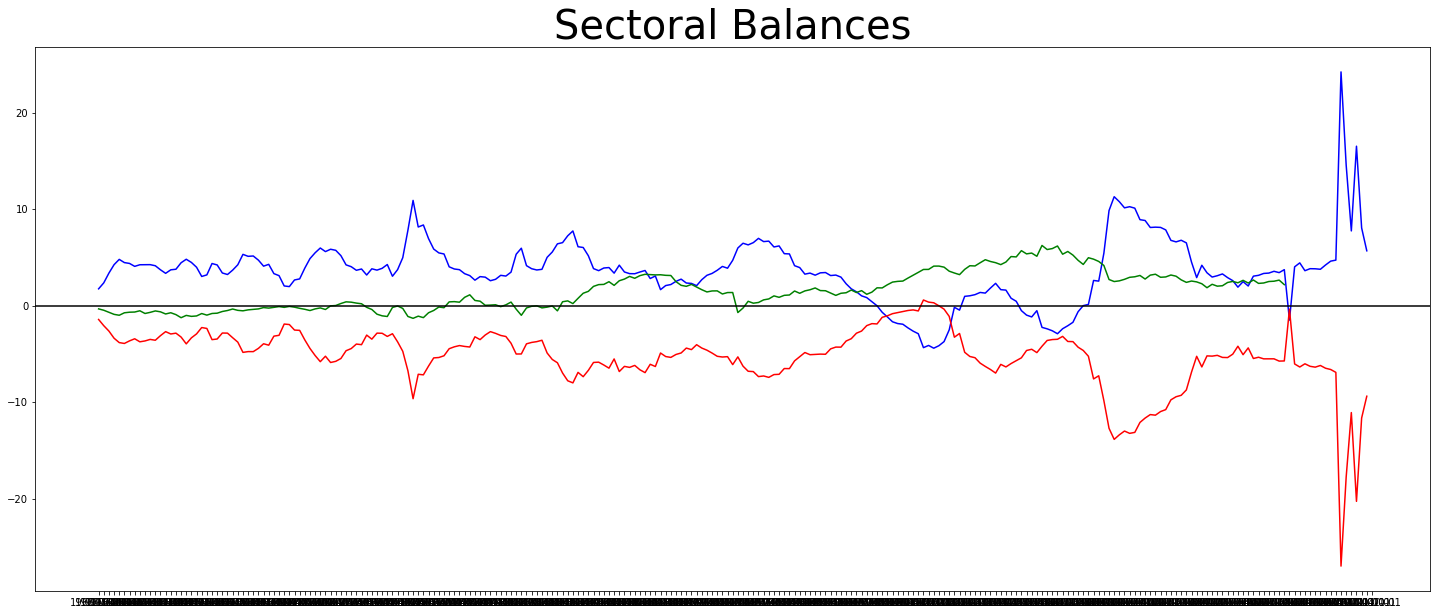

In [170]:
font = {}

font

plt.figure(figsize=(25,10)) 
plt.title('Sectoral Balances', size = 40)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of GDP')

plt.plot(df['DATE'], df['Private_%_GDP'], 'b') 
plt.plot(df['DATE'],  df['Public_%_GDP'], 'r') 
plt.plot(df['DATE'], df['Foreign_%_GDP'], 'g') 
plt.axline((0,0), (147, 0), color='k')

plt.show() 